<a href="https://colab.research.google.com/github/Tanushree-233/Dataset/blob/main/Titanic_EDA_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  5 non-null      int64  
 1   Survived     5 non-null      int64  
 2   Pclass       5 non-null      int64  
 3   Name         5 non-null      object 
 4   Sex          5 non-null      object 
 5   Age          5 non-null      int64  
 6   SibSp        5 non-null      int64  
 7   Parch        5 non-null      int64  
 8   Ticket       5 non-null      object 
 9   Fare         5 non-null      float64
 10  Cabin        2 non-null      object 
 11  Embarked     5 non-null      object 
dtypes: float64(1), int64(6), object(5)
memory usage: 612.0+ bytes
None
       PassengerId  Survived    Pclass       Age     SibSp  Parch       Fare
count     5.000000  5.000000  5.000000   5.00000  5.000000    5.0   5.000000
mean      3.000000  0.600000  2.200000  31.20000  0.600000    0.0  29.521660
std     

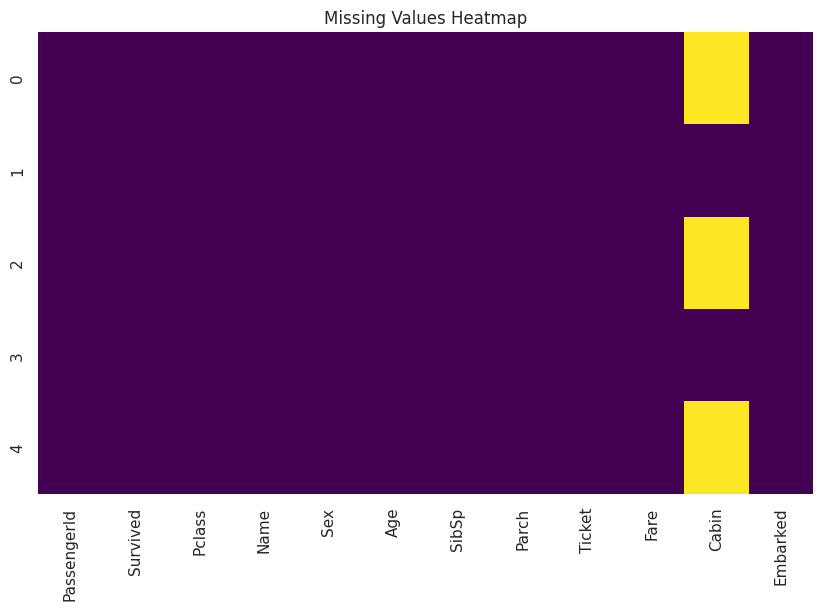

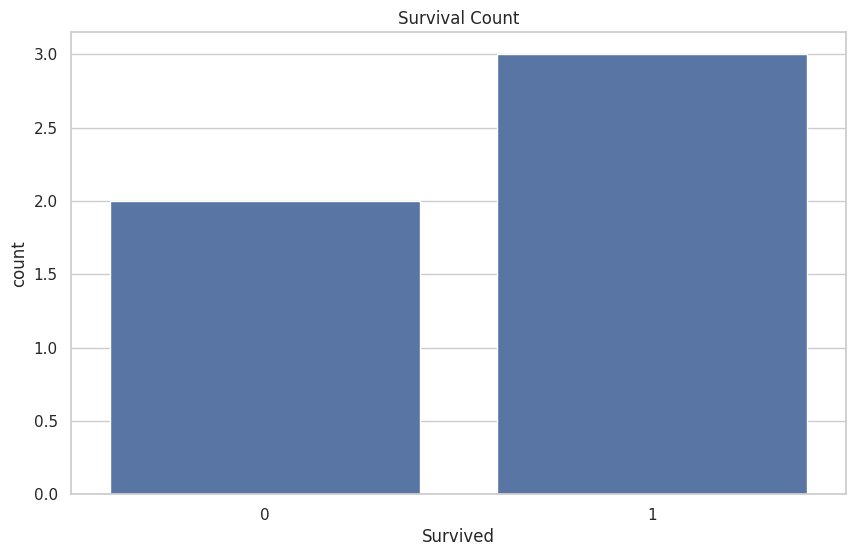

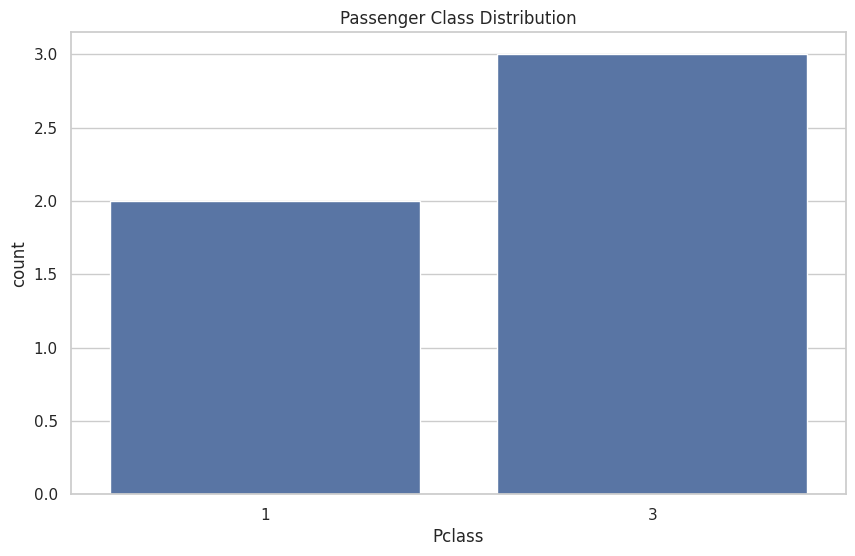

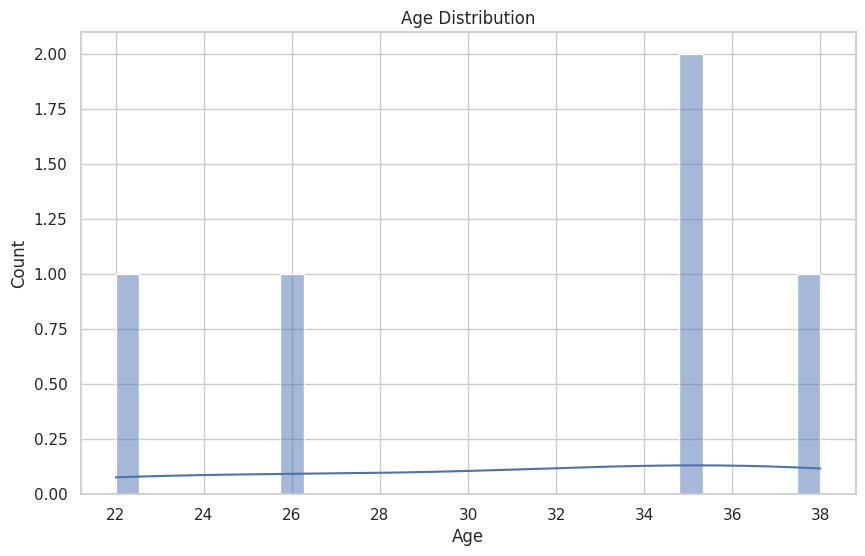

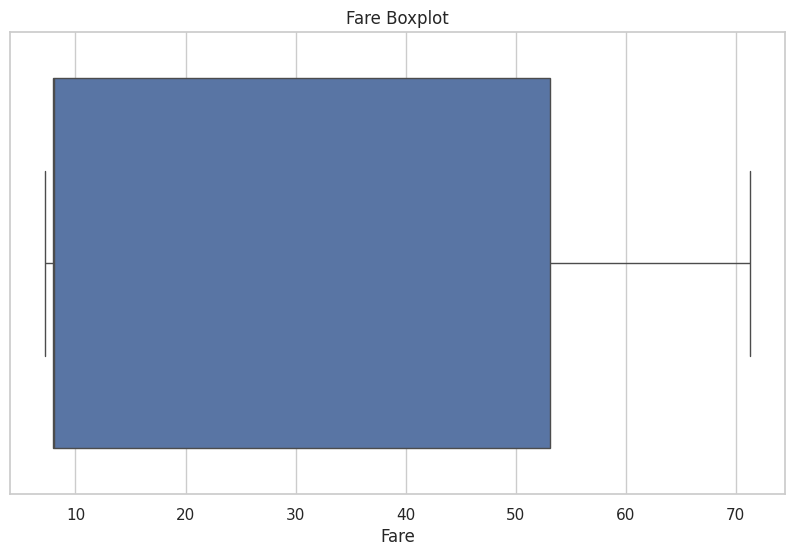

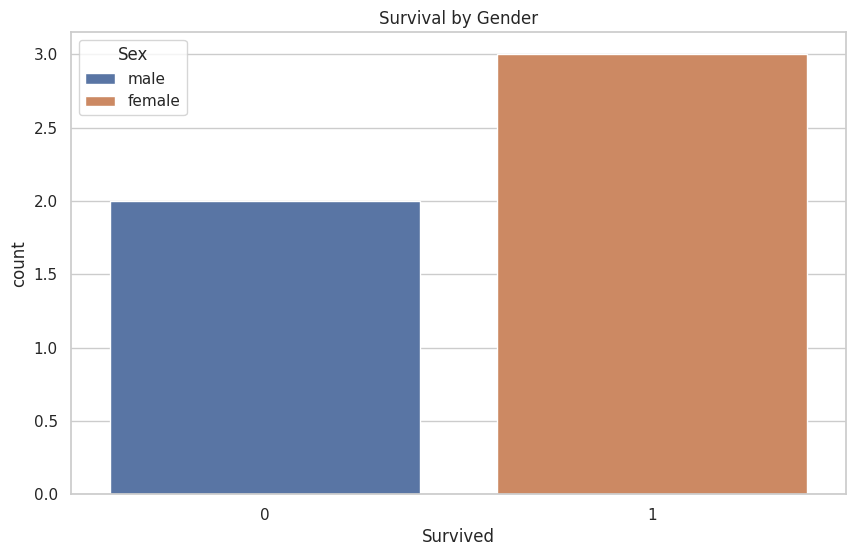

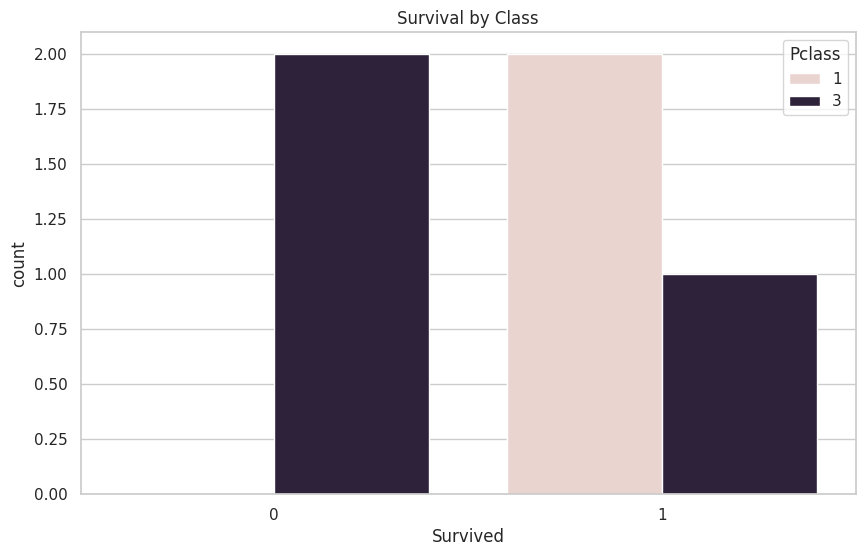

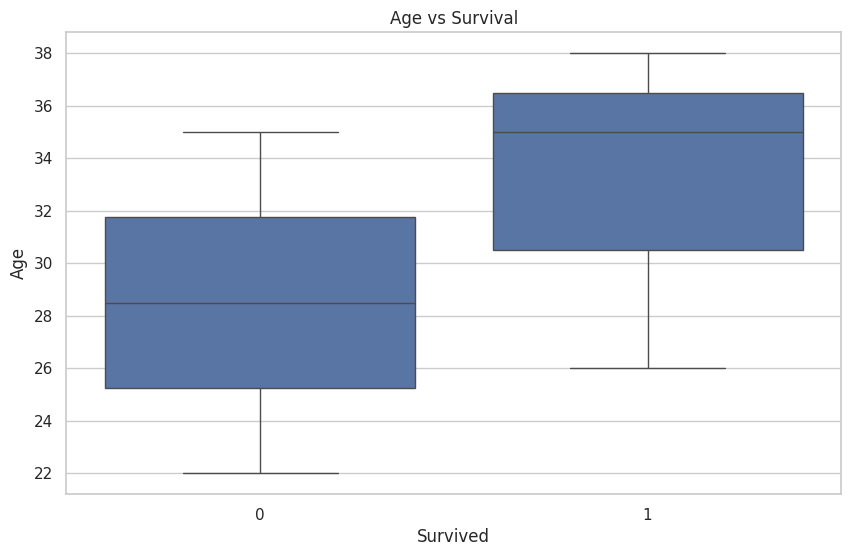

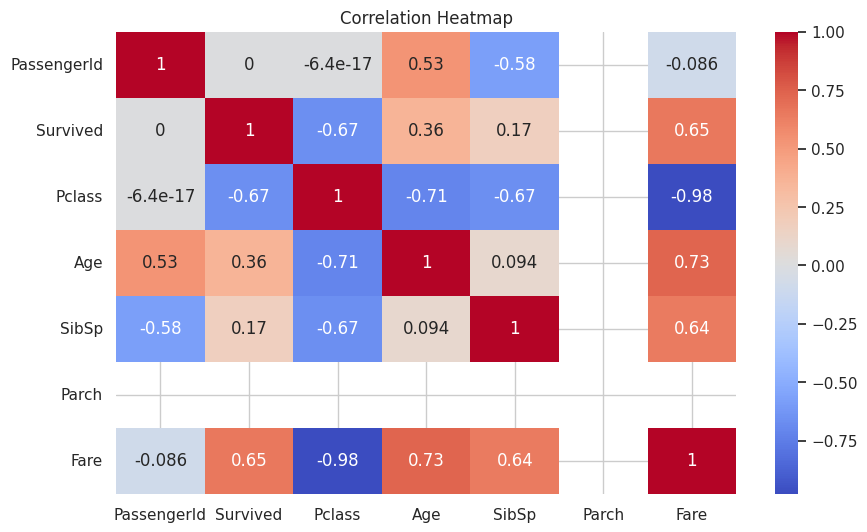

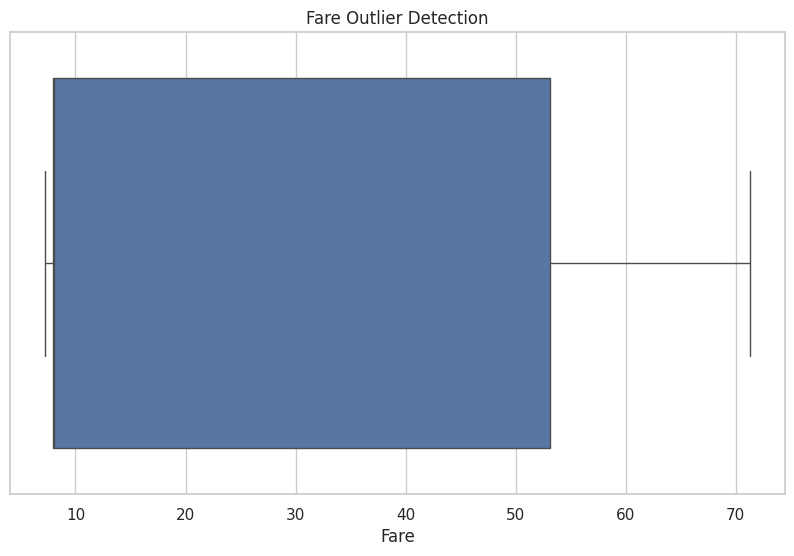

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


<ipython-input-5-27eef637e0fa>:68: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-5-27eef637e0fa>:69: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

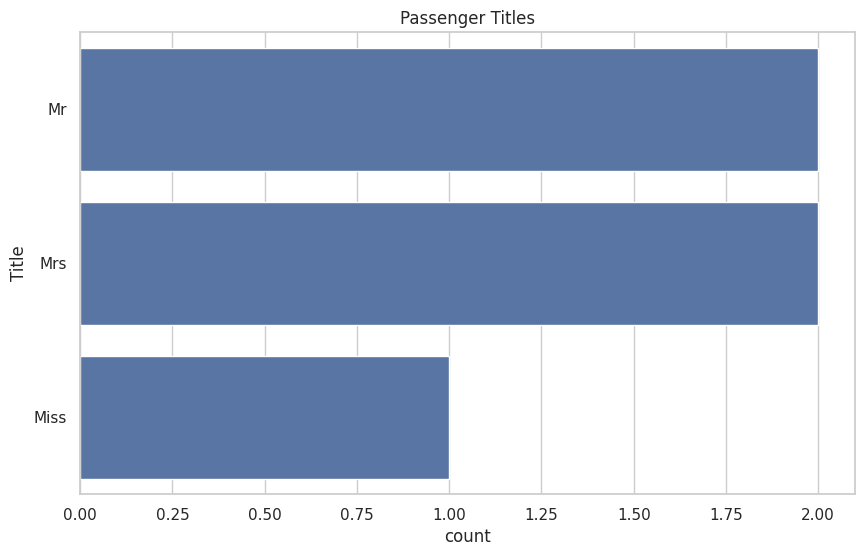

In [5]:

# Titanic Dataset - Exploratory Data Analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Step 1: Load the dataset
df = pd.read_csv("titanic.csv")  # Replace with your path if needed
df.head()

# Step 2: Basic info and stats
print(df.info())
print(df.describe())
print(df.columns)
print(df.isnull().sum())

# Step 3: Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Step 4: Univariate Analysis
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

sns.countplot(x='Pclass', data=df)
plt.title("Passenger Class Distribution")
plt.show()

sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

sns.boxplot(x='Fare', data=df)
plt.title("Fare Boxplot")
plt.show()

# Step 5: Bivariate Analysis
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Gender")
plt.show()

sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival by Class")
plt.show()

sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")
plt.show()

# Step 6: Correlation Heatmap
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Step 7: Outliers
sns.boxplot(x=df['Fare'])
plt.title("Fare Outlier Detection")
plt.show()

# Step 8: Data Cleaning
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)
print(df.isnull().sum())

# Step 9: Feature Engineering
df['FamilySize'] = df['SibSp'] + df['Parch']
df['IsAlone'] = (df['FamilySize'] == 0).astype(int)
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Visualize new features
sns.countplot(y='Title', data=df, order=df['Title'].value_counts().index)
plt.title("Passenger Titles")
plt.show()